# Задание 5

Используя библиотеку Qiskit, создайте схему квантовой телепортации для случая, когда состояние кубита телепортируется внутри одной квантовой схемы (без классических каналов передачи информации).

In [1]:
SHOTS_COUNT = 1000  # определяем количество вычислений состояния

In [2]:
from qiskit import QuantumCircuit
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer

backend = BasicAer.get_backend('qasm_simulator')

In [3]:
class QuantumTeleportation:
    """ Набор операций для квантовой телепортации """
    circuit: QuantumCircuit

    def __init__(self) -> None:
        self.q = QuantumRegister(3)
        self.c = ClassicalRegister(3)
        self.circuit = QuantumCircuit(self.q, self.c)

    def join_cubits(self) -> None:
        """ Запутывание кубитов """
        # ===========
        self.circuit.barrier()

        self.circuit.h(1)
        self.circuit.cx(1, 2)

    def operate_circuit(self) -> None:
        """ Проведение операций над схемой """
        # ============
        self.circuit.barrier()

        self.circuit.cx(0, 1)
        self.circuit.h(0)

        # =============
        self.circuit.barrier()

        self.circuit.measure([0, 1], [0, 1])

        # =============
        self.circuit.barrier()
    
        self.circuit.cx(self.q[1], self.q[2])
        self.circuit.cz(self.q[0], self.q[2])

        # =============
        self.circuit.barrier()

        self.circuit.measure(2, 2)


In [4]:
qt000 = QuantumTeleportation()
qt000.join_cubits()
qt000.operate_circuit()
qt000.circuit.draw()

░            ░      ┌───┐ ░ ┌─┐    ░          ░    
q0_0: ─░────────────░───■──┤ H ├─░─┤M├────░───────■──░────
       ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │  ░    
q0_1: ─░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───■───┼──░────
       ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │  ░ ┌─┐
q0_2: ─░──────┤ X ├─░────────────░──╫──╫──░─┤ X ├─■──░─┤M├
       ░      └───┘ ░            ░  ║  ║  ░ └───┘    ░ └╥┘
c0: 3/══════════════════════════════╩══╩════════════════╩═
                                    0  1                2

In [5]:
_qt100 = QuantumTeleportation()
_qt100.join_cubits()
_qt100.circuit.x(_qt100.q[0])  # 0 --> 1
_qt100.operate_circuit()
_qt100.circuit.draw()


░ ┌───┐      ░      ┌───┐ ░ ┌─┐    ░          ░    
q1_0: ─░─┤ X ├──────░───■──┤ H ├─░─┤M├────░───────■──░────
       ░ ├───┤      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │  ░    
q1_1: ─░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───■───┼──░────
       ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │  ░ ┌─┐
q1_2: ─░──────┤ X ├─░────────────░──╫──╫──░─┤ X ├─■──░─┤M├
       ░      └───┘ ░            ░  ║  ║  ░ └───┘    ░ └╥┘
c1: 3/══════════════════════════════╩══╩════════════════╩═
                                    0  1                2

In [6]:
qt100_ = QuantumTeleportation()
qt100_.circuit.x(qt100_.q[0])  # 0 --> 1
qt100_.join_cubits()
qt100_.operate_circuit()
qt100_.circuit.draw()


┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░          ░    
q2_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░───────■──░────
      └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │  ░    
q2_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───■───┼──░────
            ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │  ░ ┌─┐
q2_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─┤ X ├─■──░─┤M├
            ░      └───┘ ░            ░  ║  ║  ░ └───┘    ░ └╥┘
c2: 3/═══════════════════════════════════╩══╩════════════════╩═
                                         0  1                2

In [7]:
counts = execute(qt000.circuit, backend, shots=SHOTS_COUNT).result().get_counts()
counts

{'000': 235, '011': 262, '010': 249, '001': 254}

In [8]:
import matplotlib.pyplot as plt

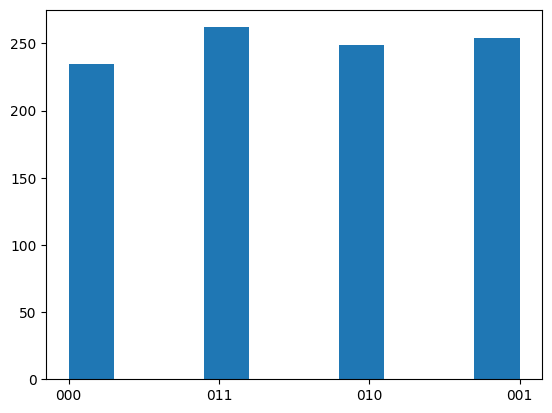

In [9]:
counts_list = [key for key, val in counts.items() for _ in range(val)]

plt.hist(counts_list)
plt.show()